In [22]:
using Pkg
Pkg.add("LinearAlgebra")
Pkg.add("Statistics")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
  [f0e99cf1] + MLBase v0.8.0
  Updating `~/.julia/Manifest.toml`
  [c8e1da08] + IterTools v1.1.1
  [f0e99cf1] + MLBase v0.8.0


In [24]:
using LinearAlgebra
using Statistics

In [20]:
##Loading MNIST dataset for training
Train_x,Train_y = MNIST.traindata()

(FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [21]:
##Loading MNIST dataset for testing
Test_x,Test_y=MNIST.testdata()

(FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [6]:
##For the basic least squares way we want to have the Test_x in matrix form not tensor which we will use for a following test .
Tr_x=(reshape(Train_x,28^2,60000))
Te_x=(reshape(Test_x,28^2,10000))

784×10000 reshape(reinterpret(FixedPointNumbers.Normed{UInt8,8}, ::Array{UInt8,3}), 784, 10000) with eltype FixedPointNumbers.Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

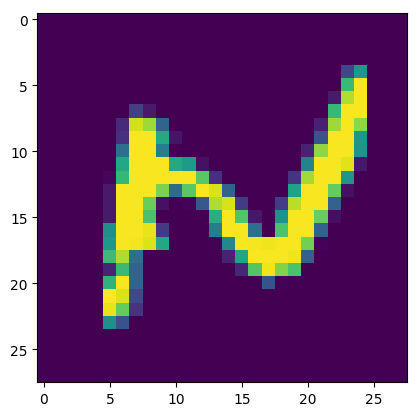

5

In [7]:
##Lets select the first image to look at for comparison on how the algorithm works
##p_img=zeros(size(Train_x,1),0)
imshow(Train_x[:,:,1])
Train_y[1]

In [10]:
##We are building a function which will return a matrix of zeros and ones with the ones being the position where the 
##specific class is found,zero being where it is not.
function one_hot(y,num_of_classes)
    
    A=zeros(length(y),num_of_classes)
    
    for i =1:class
        A[findall(y .==i),i] .=1
    end
    return A
end

##We also need to find a function which will return which class the image 
##most likely belongs to.  This location is shown in largest value of each row which 
##would be the strongest likelyhood of the class being the location.

max_location_in_row(A)=[argmax(A[i,:]) for i =1:size(A,1)]

Max_row (generic function with 1 method)

In [11]:
##We need to now change the Train_x set into a matrix suitable for a least squares process.  
##We add a vector of ones to the beginning of the training set. 
##Also the same will be done with the training set.
Train_tr_x=hcat(ones(60000),Tr_x')
Test_te_x=hcat(ones(10000),Te_x')

10000×785 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [12]:
##This is where we use the multiclass function to help us to find the parameters 
##suited for out least squares model.
function multi_class(x,y,class)
theta = x \ (2*Onehot(y,class) .- 1) 
parameters = max_location_in_row(x*theta)
return theta, parameters
end

Multi_class_model (generic function with 1 method)

In [13]:
T,P=multi_class(Train_tr_x,Train_y,10)

([-0.517347 -0.900343 … -0.908976 -1.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 7, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [14]:
##Accuracy average for training set
mean(Train_y .!= P)

0.2328

In [31]:
for i=1:length(Train_y)
    if Train_y[i]==0  
        Train_y[i]=10
    end
end

for i=1:length(Train_y)
    if P[i]==0  
        P[i]=10
    end
end

confusmat(10,Train_y,P)

10×10 Array{Int64,2}:
 6548    40    15    19    31    14    13    56     6     0
  266  4829   159   121    17   239   107   201    19     0
  167   186  5179    34   130    56   116   136   127     0
   99    43     6  5219    50    41    23    59   302     0
  100    33   459   117  4042   198    55   268   149     0
   80    66     4    85   102  5530     1    47     3     0
  189    37    48   183    10     2  5454    10   332     0
  496    68   240   116   225    58    23  4436   189     0
   60    25   120   384    13    11   496    45  4795     0
    0     0     0     0     0     0     0     0     0  5923

In [15]:
##Applying the parameters from our training set to the test set.
Test_value=Max_row(Test_te_x*T)

10000-element Array{Int64,1}:
 7
 2
 1
 7
 4
 1
 4
 9
 5
 9
 3
 4
 9
 ⋮
 5
 6
 7
 8
 9
 8
 1
 2
 3
 4
 5
 6

In [16]:
##Accuracy average for the test set.
mean(Test_y .!= Test_value)

0.2298